## Лабораторная работа №5

### Исследование вероятности экспозиции совместно с вероятностью блокировки на основе модели антенн

### Цель:
Исследование вероятности экспозиции на основе модели антенн.  

### Задание.  

В условиях предыдущей лабораторной работы №4, на двух точках, между
которыми производится проверка прямой видимости, формируется диаграмма
направленности, задающаяся вектором направления и углом. Предполагается, что
если для обеих из рассматриваемых точек вторая точка лежит внутри сектора,
описанного вектором и углом и линия прямой видимости между ними не
заблокирована, то точки находятся в области видимости друг друга.  
При условии, что направление вектора диаграммы задается случайно
равномерно распределенной величиной от 0 до 2 Pi, а угол является константой,
определить находятся ли рассматриваемые точки в области видимости друг друга.  
На основе 1000 реализаций определить вероятность нахождения точек в
области видимости друг друга. Полученный результат сравнить с результатами
математической модели.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

Для начала копирую необходимые функции из лабораторной работы № 4.

In [32]:
A = 10
q = 0.3
cir_r = 0.5
dist = 3
list_point = np.array

In [33]:

def plot_circle(x, y, r):
    angels = np.linspace(0, 2*np.pi, 50)
    cirX = x+r*np.cos(angels)
    cirY = y+r*np.sin(angels)
    plt.plot(cirX, cirY, "r")


def poisson_points(l, area):
    num_block = np.random.poisson(l*area**2)
    x = np.random.uniform(0, area, size=num_block)
    y = np.random.uniform(0, area, size=num_block)
    return x, y


def create_rect(x1, y1, x2, y2, angl):
    diff_angl = 2*np.pi - angl
    reverse_angl = np.pi/2 - diff_angl
    opp_angl = reverse_angl + np.pi
    xA = x1 + cir_r * np.cos(opp_angl)
    yA = y1 + cir_r * np.sin(opp_angl)
    xB = x1 + cir_r * np.cos(reverse_angl)
    yB = y1 + cir_r * np.sin(reverse_angl)
    xC = x2 + cir_r * np.cos(reverse_angl)
    yC = y2 + cir_r * np.sin(reverse_angl)
    xD = x2 + cir_r * np.cos(opp_angl)
    yD = y2 + cir_r * np.sin(opp_angl)

    return xA, yA, xB, yB, xC, yC, xD, yD
    

def check_dist(a, b, c):
    ca = (c-a) / norm(c-a)
    ba = (b-a) / norm(b-a)
    cb = (c-b) / norm(c-b)
    ab = (a-b) / norm(a-b)

    if np.arccos(np.dot(ca, ba)) > 1:
        return norm(c-a)

    if np.arccos(np.dot(cb, ab)) > 1:
        return norm(c-b)

    return norm(np.cross(a-b, a-c)) / norm(b-a)


def crossing():
    for i in range(len(x)):
        if (np.round(check_dist(np.array([x1, y1]), np.array([x2, y2]), np.array([x[i], y[i]])), 1) <= cir_r):
            return True

1. Задаю начальные значения

In [34]:
ang_dist = 3
ang_size = np.pi/2

2. Функция построения углов, и возврата координат вектора

In [35]:
def plot_angl(x1,y1, rand_angl, draw=True):
    x2 = x1 + ang_dist * np.cos(rand_angl)
    y2 = y1 + ang_dist * np.sin(rand_angl)
    x3 = x1 + ang_dist * np.cos(rand_angl + ang_size)
    y3 = y1 + ang_dist * np.sin(rand_angl + ang_size)
    if draw:
        plt.plot([x1,x2], [y1,y2], "--b", )
        plt.plot([x1,x3], [y1,y3], "--b", )
        return x2,y2,x3,y3
    else:
        return x2,y2,x3,y3

3. Функция для перевода декартовых координат в полярные

In [36]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

4. Проверка видимости. Если два объекта в поле видимости друг друга, то возвращаем истину

In [37]:
def check_visibility():
    r1 = cart2pol(a1x2-x1, a1y2-y1)[1] if cart2pol(a1x2-x1, a1y2-y1)[1] >= 0 else cart2pol(a1x2-x1, a1y2-y1)[1] + np.pi*2
    g1 = cart2pol(x2-x1, y2-y1)[1] if cart2pol(x2-x1, y2-y1)[1] >= 0 else cart2pol(x2-x1, y2-y1)[1] + np.pi*2
    b1 = cart2pol(a1x3-x1, a1y3-y1)[1] if cart2pol(a1x3-x1, a1y3-y1)[1] >= 0 else cart2pol(a1x3-x1, a1y3-y1)[1] + np.pi*2
    
    r2 = cart2pol(a2x2-x2, a2y2-y2)[1] if cart2pol(a2x2-x2, a2y2-y2)[1] >= 0 else cart2pol(a2x2-x2, a2y2-y2)[1] + np.pi*2
    g2 = cart2pol(x1-x2, y1-y2)[1] if cart2pol(x1-x2, y1-y2)[1] >= 0 else cart2pol(x1-x2, y1-y2)[1] + np.pi*2
    b2 = cart2pol(a2x3-x2, a2y3-y2)[1] if cart2pol(a2x3-x2, a2y3-y2)[1] >= 0 else cart2pol(a2x3-x2, a2y3-y2)[1] + np.pi*2
    
    if g1 > r1 and g1 < b1 and g2 > r2 and g2 < b2: 
        return True
    else:
        return False

5. С помощью функций из лабораторной работы № 4 отрисовываю модель 

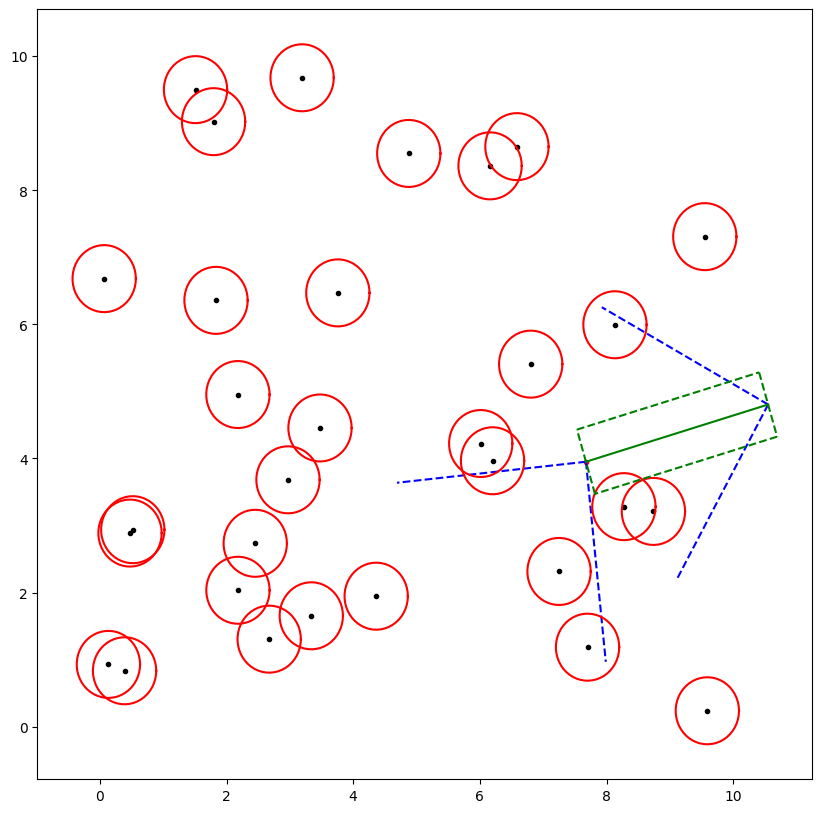

In [38]:
# circle cents
x_cir,y_cir = poisson_points(q, A)

# line angel 
angl = np.random.uniform(0, 2*np.pi)

# line coords
x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

# rect coords 
xA, yA, xB, yB, xC, yC, xD, yD = create_rect(x1,y1,x2,y2,angl)

plt.figure(figsize=(10,10))
plt.plot(x1,y1,".r")

#plot angles
a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi))
a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi))

# plot circles
plt.plot(x_cir, y_cir, ".k")
for i in range(len(x_cir)):
    plot_circle(x_cir[i], y_cir[i], cir_r)

# plot line
plt.plot([x1,x2], [y1,y2], "-g")



# plot rect
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")

6. Проверяю блокировку

In [39]:
if crossing():
    print("Blocked")
else:
    print("Free")

Blocked


7. Проверяю видимость

In [40]:
if check_visibility():
    print("Visible")
else:
    print("NOT visible")

NOT visible


8. Подсчет вероятности перекрытия видимости и блокировки

In [41]:
N = 1000
cnt = 0

for i in range(N):
    # circle cents
    x,y = poisson_points(q, A)

    # line angel 
    angl = np.random.uniform(0, 2*np.pi)

    # line coords
    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl)
    
    # visibility lines
    a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi), draw=False)
    a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi), draw=False)
    
    if crossing() and check_visibility():
        cnt += 1
        
print(cnt/N)

0.023
